<a href="https://colab.research.google.com/github/yumnazakkiya/DQLAB_ML_AI/blob/main/SESI04/Supervised_Learning_Regression_(I)_Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# Import Dataset

In [ ]:
df = pd.read_csv('HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Data Cleaning

Untuk saat ini dilakukan drop duplikat dan missing values.

Nantinya data cleaning dilakukan sesuai dengan konteks datanya.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna()

# Linear Regression

Sebelum melakukan prediksi, terlebih dahulu harus ditentukan mana kolom yang menjadi feature dan target.

Dalam hal ini kita akan menggunakan `MEDV` sebagai target dan lainnya sebagai feature.

## Split Feature dan Target

In [ ]:
X = df.drop(columns='MEDV') # Feature untuk memprediksi
y = df[['MEDV']] # Target yang akan diprediksi

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [ ]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((315, 13), (79, 13), (315, 1), (79, 1))

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

# Tentukan model yang akan digunakan
lin_reg = LinearRegression()

# Train Model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
data = X_train
model = lin_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,33.652405
1,CRIM,-0.112187
2,ZN,0.042440
3,INDUS,0.025673
4,CHAS,1.983837
5,NOX,-17.079257
6,RM,4.258091
7,AGE,-0.021741
8,DIS,-1.424189
9,RAD,0.235588


Contoh interpretasi dari koefisien :
* Setiap kenaikan 1 poin dari ZN dengan asumsi feature lain dianggap tetap, akan terjadi kenaikan 0.042440 pada MEDV.

# Multiple Linear Regression

## Split Feature dan Target

In [ ]:
X = df.drop(columns='MEDV') # Feature untuk memprediksi
y = df[['MEDV']] # Target yang akan diprediksi

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((315, 13), (79, 13), (315, 1), (79, 1))

## Multicollinearity Check

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.682416
2,ZN,2.273766
3,INDUS,4.241354
4,CHAS,1.089018
5,NOX,4.452894
6,RM,2.085863
7,AGE,3.163989
8,DIS,4.033996
9,RAD,7.100781
10,TAX,9.157594


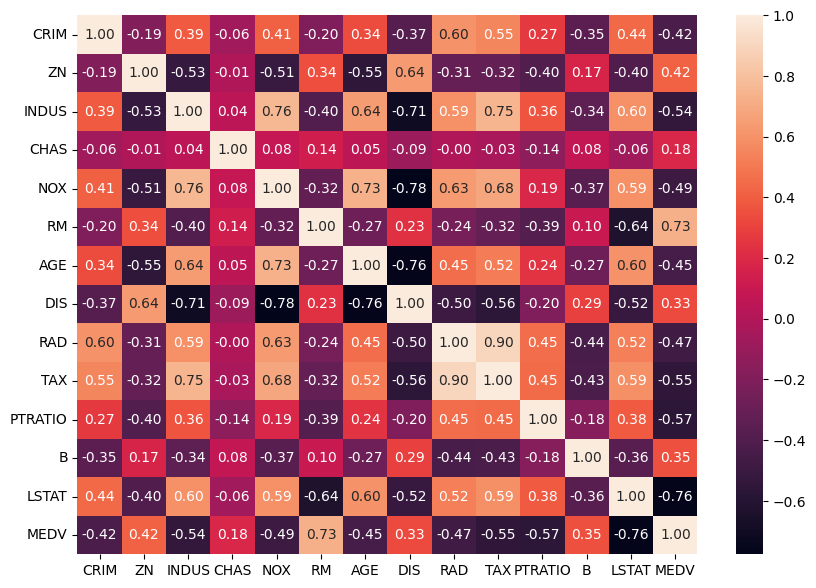

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap correlation
data_train = pd.concat([X_train, y_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

`TAX` dan `RAD` mempunyai nilai vif score cukup tinggi.

`TAX` dan `RAD` mempunyai korelasi yang kuat. `TAX` mempunyai korelasi yang lebih kuat terhadap target yaitu `MEDV` dibandingkan `RAD`, sehingga dipilih `RAD` untuk didrop.

In [ ]:
X_train = X_train.drop(columns=['RAD'])
X_test = X_test.drop(columns=['RAD'])

## Recheck multicollinearity

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.555775
2,ZN,2.230211
3,INDUS,3.706428
4,CHAS,1.072991
5,NOX,4.184477
6,RM,2.045362
7,AGE,3.150615
8,DIS,4.015898
9,TAX,3.728418
10,PTRATIO,1.746087


Tidak ada lagi vif score yang tinggi

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

# Tentukan model yang akan digunakan
multi_reg = LinearRegression()

# Train Model
multi_reg.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

### Training Error

Prediksi data train menggunakan model yang sudah dilatih

In [ ]:
y_predict_train = multi_reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))

R-squared for training data is 0.734629719912701
RMSE for training data is 4.15879372493931


### Testing Error

Prediksi data test menggunakan model yang sudah dilatih

In [ ]:
y_predict_test = multi_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_test))))

RMSE for testing data is 5.7775677975912645
